# NASA Asteroids Datasets
The aim of this analysis is to explore the features associated with the hazardous asteroids

#### Importing the dataset and exploring its parameters :

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
original_df = pd.read_csv("./Dataset/nasa.csv")
original_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
original_df.shape

(4687, 40)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [5]:
original_df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

#### Preparing the data for analysis:

In [6]:
#droping features that we are sure that it is not important 
df = original_df.drop(columns=["Orbiting Body","Neo Reference ID","Name","Close Approach Date","Epoch Date Close Approach","Orbit Uncertainity","Orbit Determination Date"])
#droping repated features
df = df.drop(columns=["Est Dia in M(min)","Est Dia in M(max)","Est Dia in Miles(min)","Est Dia in Miles(max)",
"Est Dia in Feet(min)","Est Dia in Feet(max)","Relative Velocity km per sec","Miles per hour","Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)"])

In [7]:
df["Hazardous"] = df["Hazardous"].astype(int)
df["Hazardous"].head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int32

In [8]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,22017.003799,62753692.0,17,0.025282,4.634,2458000.5,0.425549,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,21.3,0.146068,0.326618,65210.346095,57298148.0,21,0.186935,5.457,2458000.5,0.351674,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,20.3,0.231502,0.517654,27326.560182,7622911.5,22,0.043058,4.557,2458000.5,0.348248,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,27.4,0.008801,0.019681,40225.948191,42683616.0,7,0.005512,5.093,2458000.5,0.216578,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,21.6,0.127220,0.284472,35426.991794,61010824.0,25,0.034798,5.154,2458000.5,0.210448,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Est Dia in KM(max)           4687 non-null   float64
 3   Relative Velocity km per hr  4687 non-null   float64
 4   Miss Dist.(kilometers)       4687 non-null   float64
 5   Orbit ID                     4687 non-null   int64  
 6   Minimum Orbit Intersection   4687 non-null   float64
 7   Jupiter Tisserand Invariant  4687 non-null   float64
 8   Epoch Osculation             4687 non-null   float64
 9   Eccentricity                 4687 non-null   float64
 10  Semi Major Axis              4687 non-null   float64
 11  Inclination                  4687 non-null   float64
 12  Asc Node Longitude           4687 non-null   float64
 13  Orbital Period    

### Exploring the important features to work on :

##### Exploring the association between the Orbit ID (the orbit taken by the asteroid) and the asteroid's hazardness:

In [10]:
orbits_statistics = []
orbits_ids = sorted(df["Orbit ID"].unique())

In [11]:
for orbit in orbits_ids:
    orbit_data = df[df["Orbit ID"] == orbit]
    orbits_statistics.append({"ID":orbit,"Occurrence Count":len(orbit_data),"Hazardness Count":orbit_data["Hazardous"].sum(),
    "Hazardness Probability":orbit_data["Hazardous"].sum()/len(orbit_data)})

In [12]:
orbits_statistics_df = pd.DataFrame(orbits_statistics)
orbits_statistics_df

,ID,Occurrence Count,Hazardness Count,Hazardness Probability
0,1,11,0,0.000000
1,2,27,1,0.037037
2,3,82,0,0.000000
3,4,125,0,0.000000
4,5,139,3,0.021583
...,...,...,...,...
183,386,2,0,0.000000
184,412,1,0,0.000000
185,422,1,0,0.000000
186,453,1,0,0.000000


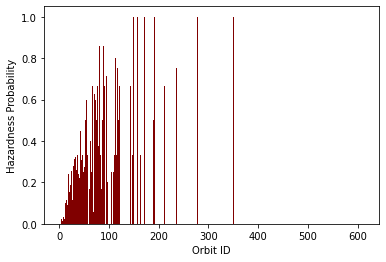

In [13]:
plt.bar(orbits_statistics_df["ID"],orbits_statistics_df["Hazardness Probability"],color="maroon",width=1)
plt.xlabel("Orbit ID")
plt.ylabel("Hazardness Probability")
plt.show()

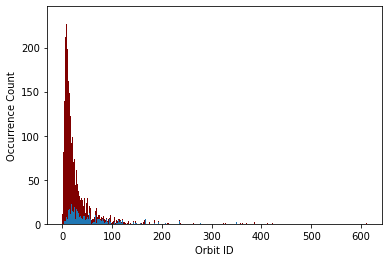

In [14]:
plt.bar(orbits_statistics_df["ID"],orbits_statistics_df["Occurrence Count"],color="maroon",width=1)
plt.bar(orbits_statistics_df["ID"],orbits_statistics_df["Hazardness Count"],width=1)
plt.xlabel("Orbit ID")
plt.ylabel("Occurrence Count")
plt.show()

##### Based on the results:
    We can see that orbits with small id value had occurred the most in our dataset, however it had low probability that the asteroid taking that oribit is actually hazardous, on the otherhand the orbits the occurred fewer times in our dataset appear to be more linked with the hazardness of the asteroids taking that path.
##### We MUST note that:
    There is a limitation in our dataset on the recorded occurrences for each orbit which makes the probabilities of hazardness for each orbit less representative. 

#### Exploring relationship between asteroid hazardness and its Mean Motion, Mean Anomaly, Velocity and Absolute Magnitude :

<AxesSubplot:xlabel='Hazardous', ylabel='Mean Motion'>

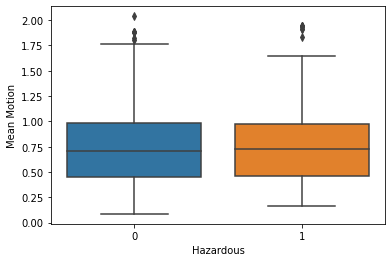

In [15]:
sns.boxplot(x="Hazardous",y="Mean Motion",data=df)

<AxesSubplot:xlabel='Hazardous', ylabel='Mean Anomaly'>

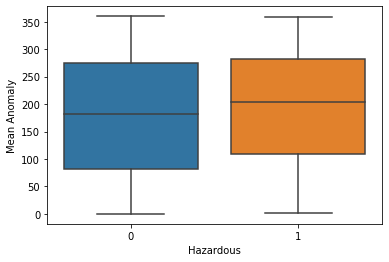

In [16]:
sns.boxplot(x="Hazardous",y="Mean Anomaly",data=df)

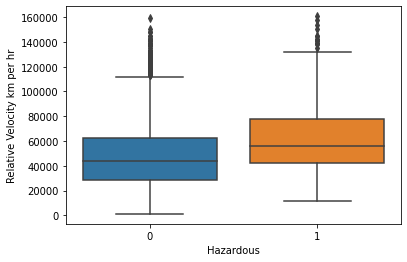

In [17]:
sns.boxplot(x="Hazardous",y="Relative Velocity km per hr",data=df);

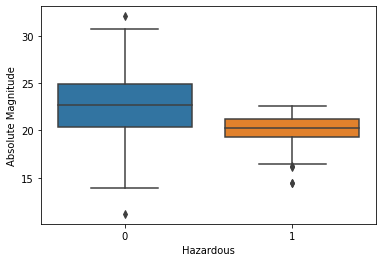

In [18]:
sns.boxplot(x="Hazardous",y="Absolute Magnitude",data=df);

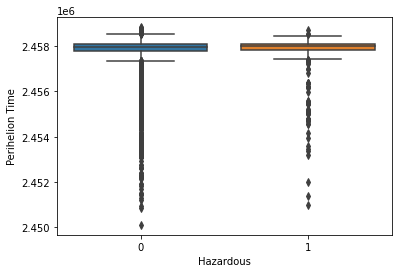

In [19]:
sns.boxplot(x="Hazardous",y="Perihelion Time",data=df);

#### Based on the previous graphs :

- __Mean Motion__ : There is no significant difference between hazardous and non-hazardous asteroids within this feature.
- __Mean Anomaly__ : For hazrdous asteroid the mean value of the mean anomaly is slightlty higher other than that there is no other significant difference within that feature
- __Relative Velocity__ : Hazardous asteroids are more associated with having higher velocities and the mean relative velocity of hazardous asteroids is significantly higher than that of non-hazardous asteroids.
- __Absolute Magnitude__ : The higher the absolute magnitude of the asteroid the less probable that it turns out to be hazardous and this is clear for that the mean absolute magnitude for non-hazardous asteroids is significantly higher than that of hazardous asteroids.
- __Perihelion Time__: It can be noted that the mean perihelion time for hazrdous asteroids is higher than that of non-hazardous ones.

__Based on all of this, the relation between the last four variable listed above and the hazardness of the asteroids can be taken into consideration when determining whether a new viewed asteroid is hazardous or non-hazardous.__